### Build a Simple state graph using LangGraph
#### State

First, define the state of the graph.
The state schema serves as the input schema for all nodes and edges in the graph.
Let's use the TypedDict class from python's typing module as our schema, which provides type hints for the keys.

In [2]:
from typing_extensions import TypedDict

class State(TypedDict):
    graph_info: str

In [4]:
# Node functions

def start_play(state: State):
    print("Start play node has been called")
    return {"graph_info": state["graph_info"] + " I am planning to play"}

def cricket(state: State):
    print("Cricket node has been called")
    return {"graph_info": state["graph_info"] + " Cricket"}

def football(state: State):
    print("Football node has been called")
    return {"graph_info": state["graph_info"] + " Football"}

In [5]:
import random
from typing import Literal

def random_play(state: State) -> Literal["cricket", "football"]:
   if random.random() > 0.5:
       return "cricket"
   else:
       return "football"

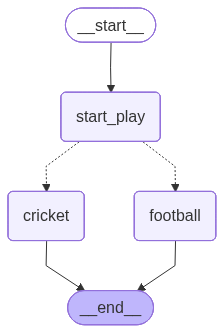

In [9]:
from IPython.display import display, Image
from langgraph.graph import StateGraph, START, END

# Define the graph
graph = StateGraph(State)

# Add nodes
graph.add_node("start_play", start_play)
graph.add_node("cricket", cricket)
graph.add_node("football", football)

#schedule flow of graph
graph.add_edge(START, "start_play")
graph.add_conditional_edges("start_play", random_play, {"cricket": "cricket", "football": "football"})
graph.add_edge("cricket", END)
graph.add_edge("football", END)

#compile the graph

graph_builder = graph.compile()

#view
display(Image(graph_builder.get_graph().draw_mermaid_png()))

In [12]:
graph_builder.invoke({"graph_info": "Today I want to play"})

Start play node has been called
Football node has been called


{'graph_info': 'Today I want to play I am planning to play Football'}